# Using Neural Networks to classify handwritten digits

In [1]:
from keras.layers import Dense
%matplotlib inline
import keras
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


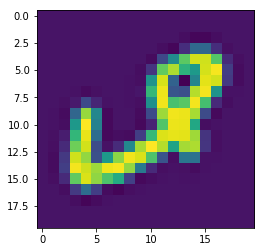

In [29]:
plt.imshow(data[0,:-1].reshape((20,20)))

In [2]:
from scipy.io import loadmat
data = loadmat('ex3data1.mat')['X']
labels = loadmat('ex3data1.mat')['y']
data = np.concatenate([data,labels],axis=1)
np.random.shuffle(data)
train_data = data[:4000]
test_data = data[4000:]

In [3]:
# creating training/test set
train_x = train_data[:,:-1]
train_y = np.copy(train_data[:,-1]).reshape((train_x.shape[0],1))
test_x = test_data[:,:-1]
test_y = np.copy(test_data[:,-1]).reshape((test_x.shape[0],1))

# # feature scaling
# train_x = (train_x - np.mean(train_x))/np.std(train_x)
# test_x = (test_x - np.mean(test_x))/np.std(test_x)

In [4]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
train_x = sc_x.fit_transform(train_x)
test_x = sc_x.transform(test_x)

In [5]:
classifier = Sequential()

In [6]:
classifier.add(Dense(activation="relu", input_dim=400, units=205, kernel_initializer="uniform"))

In [7]:
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax'))

In [8]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
train_y = OneHotEncoder(categorical_features=[0]).fit_transform(train_y).toarray()

In [10]:
classifier.fit(train_x, train_y, batch_size = 5, epochs = 30)

Epoch 1/30
4000/4000 [==============================] - 3s 664us/step - loss: 0.4858 - acc: 0.8630
Epoch 2/30
4000/4000 [==============================] - 2s 585us/step - loss: 0.1792 - acc: 0.9478
Epoch 3/30
4000/4000 [==============================] - 2s 602us/step - loss: 0.0972 - acc: 0.9713
Epoch 4/30
4000/4000 [==============================] - 3s 632us/step - loss: 0.0549 - acc: 0.9855
Epoch 5/30
4000/4000 [==============================] - 2s 600us/step - loss: 0.0305 - acc: 0.9923
Epoch 6/30
4000/4000 [==============================] - 2s 583us/step - loss: 0.0191 - acc: 0.9950
Epoch 7/30
4000/4000 [==============================] - 2s 585us/step - loss: 0.0302 - acc: 0.9905
Epoch 8/30
4000/4000 [==============================] - 2s 592us/step - loss: 0.0415 - acc: 0.9878
Epoch 9/30
4000/4000 [==============================] - 2s 598us/step - loss: 0.0380 - acc: 0.9915
Epoch 10/30
3570/4000 [=========================>....] - ETA: 0s - loss: 0.0090 - acc: 0.9980

KeyboardInterrupt: 

In [11]:
y_pred = classifier.predict(test_x)
y_pred = np.argmax(y_pred,axis=1) +1

In [12]:
y_pred = y_pred[:,None]

In [13]:
from sklearn.metrics import confusion_matrix
arr = confusion_matrix(test_y,y_pred)

In [14]:
np.sum(np.diag(arr))/10

94.5

In [15]:
test_x.shape

(1000, 400)

# MNIST DATASET

In [50]:
import struct

In [51]:
def read_data(file):
    with open(file,'rb') as f:
        if 'labels' in f.name:
            magic,images = struct.unpack('>II',f.read(8))
            data = np.fromfile(f,dtype=np.int8)
            return data.reshape((images,1))
        else:
            magic,images,pixel_rows,pixel_cols = struct.unpack('>IIII',f.read(16))
            data = np.fromfile(f,dtype=np.int8)
            return data.reshape((images,pixel_rows*pixel_cols))

In [52]:
train_x = read_data('train-images-idx3-ubyte')
train_y = read_data('train-labels-idx1-ubyte')
test_x  = read_data('t10k-images-idx3-ubyte')
test_y = read_data('t10k-labels-idx1-ubyte')

In [53]:
sc_x1 = StandardScaler()
train_x = sc_x1.fit_transform(train_x)
test_x = sc_x1.transform(test_x)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [30]:
train_x.shape

(60000, 784)

In [15]:
classifier_1 = Sequential()

In [16]:
classifier_1.add(Dense(input_dim=784,units=400,activation='relu',kernel_initializer="uniform"))

In [17]:
classifier_1.add(Dense(units=200,activation='relu',kernel_initializer="uniform"))

In [18]:
classifier_1.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax'))

In [19]:
classifier_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
train_y = OneHotEncoder(categorical_features=[0]).fit_transform(train_y).toarray()

In [38]:
classifier_1.fit(train_x, train_y, batch_size = 10, epochs = 10)

In [39]:
y_pred = classifier_1.predict(test_x)
y_pred = np.argmax(y_pred,axis=1)
y_pred = y_pred[:,None]
arr = confusion_matrix(test_y,y_pred)
np.sum(np.diag(arr))/test_y.shape[0]

In [77]:
arr

array([[ 959,    1,    3,    4,    1,    3,    5,    0,    2,    2],
       [   4, 1111,    9,    3,    0,    1,    4,    1,    2,    0],
       [  11,    1,  967,   22,    1,    2,   10,    7,   11,    0],
       [   3,    1,   15,  952,    0,   10,    0,    5,   17,    7],
       [   9,    5,    5,    2,  895,    1,    8,    5,   11,   41],
       [   8,    1,    2,   67,    1,  783,   12,    0,   14,    4],
       [  13,    2,    0,    0,    3,   10,  926,    0,    3,    1],
       [   2,    5,   18,   10,   10,    0,    0,  926,    3,   54],
       [  25,    0,   10,   34,    4,   15,    3,    4,  868,   11],
       [  10,    9,    2,   16,   11,    3,    0,   18,    6,  934]])

# Using convolutional neural network

In [54]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten


In [63]:
clf = Sequential()
clf.add(Convolution2D(64,3,3,input_shape = (28,28,1), activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


In [64]:
clf.add(Flatten())

In [65]:
clf.add(Dense(units=128,activation='relu'))
clf.add(Dense(units=10,activation='softmax'))

In [66]:
clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
train_x = train_x.reshape((60000,28,28,1))
test_x = test_x.reshape((10000,28,28,1))
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
train_y = OneHotEncoder(categorical_features=[0]).fit_transform(train_y).toarray()

In [67]:
clf.fit(train_x,train_y,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 112s 2ms/step - loss: 0.4096 - acc: 0.8734
Epoch 2/3
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2242 - acc: 0.9296
Epoch 3/3
60000/60000 [==============================] - 102s 2ms/step - loss: 0.1634 - acc: 0.9490


In [61]:
y_pred = clf.predict(test_x)
y_pred = np.argmax(y_pred,axis=1)
y_pred = y_pred[:,None]
arr = confusion_matrix(test_y,y_pred)
np.sum(np.diag(arr))/test_y.shape[0]

0.93489999999999995

In [62]:
arr

array([[ 946,    0,    3,    4,    2,    4,    8,    2,   11,    0],
       [   3, 1116,    4,    3,    0,    1,    4,    1,    2,    1],
       [  11,    1,  951,   32,    0,    0,    8,    7,   20,    2],
       [   4,    0,   21,  916,    0,   31,    2,    9,   21,    6],
       [  11,    3,    5,    1,  902,    2,   11,    8,    8,   31],
       [   5,    1,    3,   25,    1,  822,   11,    0,   21,    3],
       [   9,    3,    2,    1,    3,   13,  924,    0,    3,    0],
       [   2,    6,   17,    5,   14,    1,    1,  947,    8,   27],
       [  16,    0,    7,   17,    2,   19,    5,    2,  894,   12],
       [   6,    6,    0,    9,   29,    8,    0,   15,    5,  931]])

In [75]:
arr

array([[ 959,    1,    3,    4,    1,    3,    5,    0,    2,    2],
       [   4, 1111,    9,    3,    0,    1,    4,    1,    2,    0],
       [  11,    1,  967,   22,    1,    2,   10,    7,   11,    0],
       [   3,    1,   15,  952,    0,   10,    0,    5,   17,    7],
       [   9,    5,    5,    2,  895,    1,    8,    5,   11,   41],
       [   8,    1,    2,   67,    1,  783,   12,    0,   14,    4],
       [  13,    2,    0,    0,    3,   10,  926,    0,    3,    1],
       [   2,    5,   18,   10,   10,    0,    0,  926,    3,   54],
       [  25,    0,   10,   34,    4,   15,    3,    4,  868,   11],
       [  10,    9,    2,   16,   11,    3,    0,   18,    6,  934]])